# Ames Housing Data Analysis

**Previous:** [EDA and Preprocessing](./01_EDA_and_Preprocessing.ipynb)

## Modeling

#### Imports

In [33]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.metrics import classification_report, r2_score
from sklearn.neighbors import KNeighborsClassifier

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### Read saved files

In [34]:
df = pd.read_csv('../datasets/df.csv')
train_clean = pd.read_csv('../datasets/train_clean.csv')
test_clean = pd.read_csv('../datasets/test_clean.csv')

#### Assigning Features and Target variable

In [35]:
#assign variables to target and features
target = 'SalePrice'
features = [col for col in train_clean.columns if col != target]

In [36]:
X_mod_1 = train_clean[features]
y = train_clean[target]

#### Train test split and scaling

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_mod_1, y, random_state=42)

In [38]:
#Scale data
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

#### Selection of features using lasso model

In [39]:
#Instantiate model
lasso_mod_1 = LassoCV(n_alphas=200)

In [40]:
#Fit model
lasso_mod_1.fit(X_train_ss, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

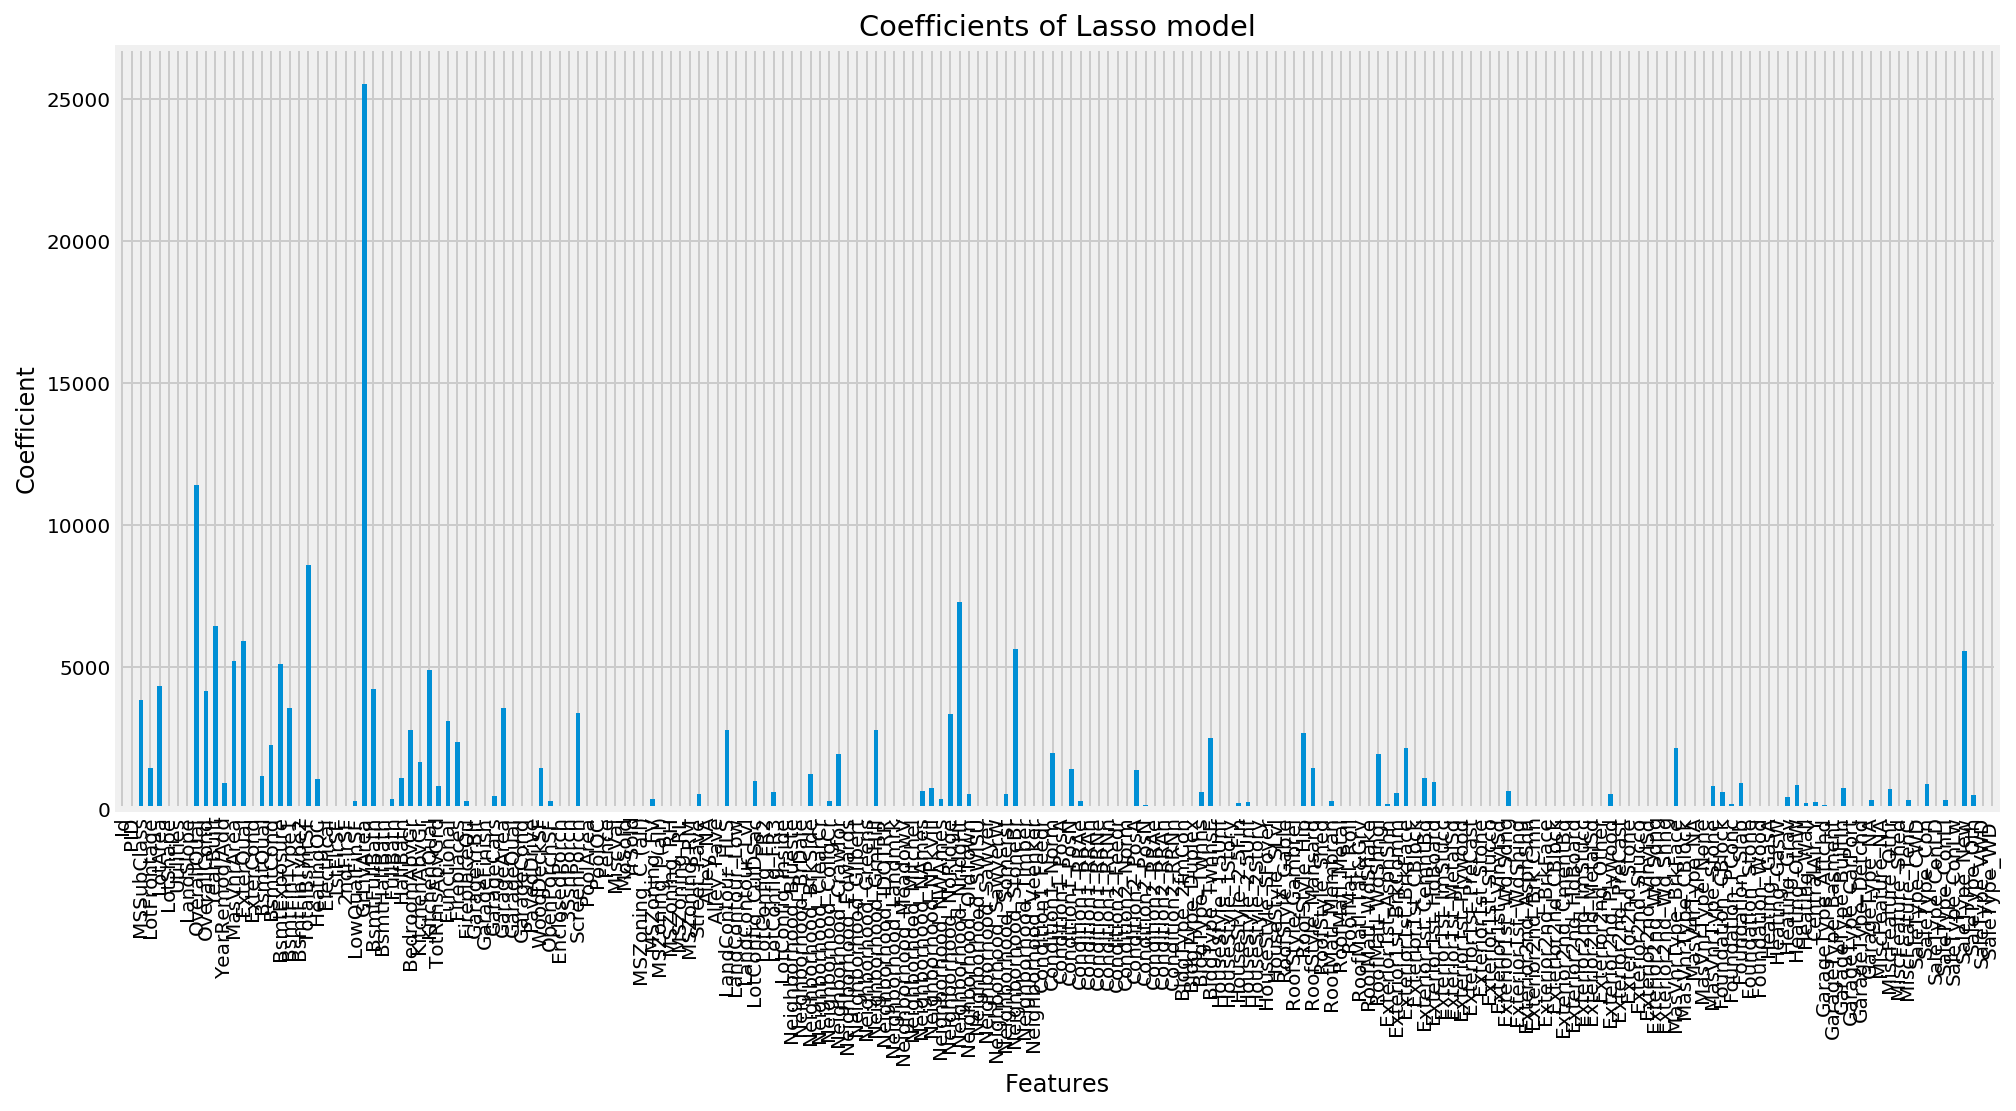

In [41]:
#For visualisation purposes
pd.Series(np.abs(lasso_mod_1.coef_), index=features).plot.bar(figsize=(15, 7))
plt.title('Coefficients of Lasso model');
plt.xlabel('Features');
plt.ylabel('Coefficient');

In [42]:
# find features with highest coefficients from Lasso

lasso_features = pd.DataFrame(X_mod_1.columns, columns=['features'])
lasso_features['coef'] = lasso_mod_1.coef_
# lasso_features['abs_coef'] = np.abs(lasso_mod_1.coef_)
lasso_feat = lasso_features.sort_values(by='coef', ascending=False).head(50)
lasso_feat

,features,coef
26,GrLivArea,25534.057922
8,OverallQual,11417.392636
20,TotalBsmtSF,8583.920762
90,Neighborhood_NridgHt,7285.814604
10,YearBuilt,6433.076142
13,ExterQual,5914.138436
96,Neighborhood_StoneBr,5622.202609
198,SaleType_New,5556.405172
12,MasVnrArea,5196.389512
17,BsmtExposure,5103.788282


In [44]:
#worst features
lasso_features.sort_values(by='coef', ascending=True).head(15)

,features,coef
2,MSSubClass,-3815.841964
31,BedroomAbvGr,-2777.767325
117,BldgType_TwnhsE,-2471.559649
16,BsmtCond,-2238.986450
167,MasVnrType_BrkFace,-2121.055973
32,KitchenAbvGr,-1635.540045
128,RoofStyle_Mansard,-1431.916878
141,Exterior1st_HdBoard,-930.225945
180,Heating_OthW,-845.519784
86,Neighborhood_NAmes,-636.605188


In [45]:
#features selected determined by lasso model
features_1 = lasso_feat['features'].values
features_1

array(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'Neighborhood_NridgHt',
       'YearBuilt', 'ExterQual', 'Neighborhood_StoneBr', 'SaleType_New',
       'MasVnrArea', 'BsmtExposure', 'KitchenQual', 'LotArea',
       'BsmtFullBath', 'OverallCond', 'BsmtFinType1', 'GarageArea',
       'ScreenPorch', 'Neighborhood_NoRidge', 'Functional',
       'Neighborhood_GrnHill', 'LandContour_HLS', 'RoofStyle_Hip',
       'Fireplaces', 'Exterior1st_BrkFace', 'Condition1_Norm',
       'Neighborhood_Crawfor', 'RoofMatl_WdShngl', 'WoodDeckSF',
       'LotFrontage', 'Condition1_PosN', 'Condition2_PosA',
       'Neighborhood_BrkSide', 'BsmtQual', 'Exterior1st_CemntBd',
       'HalfBath', 'HeatingQC', 'LotConfig_CulDSac', 'Foundation_Slab',
       'YearRemod/Add', 'SaleType_Con', 'MasVnrType_Stone',
       'TotRmsAbvGrd', 'Neighborhood_NPkVill', 'GarageType_BuiltIn',
       'MiscFeature_Othr', 'Neighborhood_Somerst', 'Street_Pave',
       'SaleType_Oth', 'GarageCars', 'FullBath'], dtype=object)

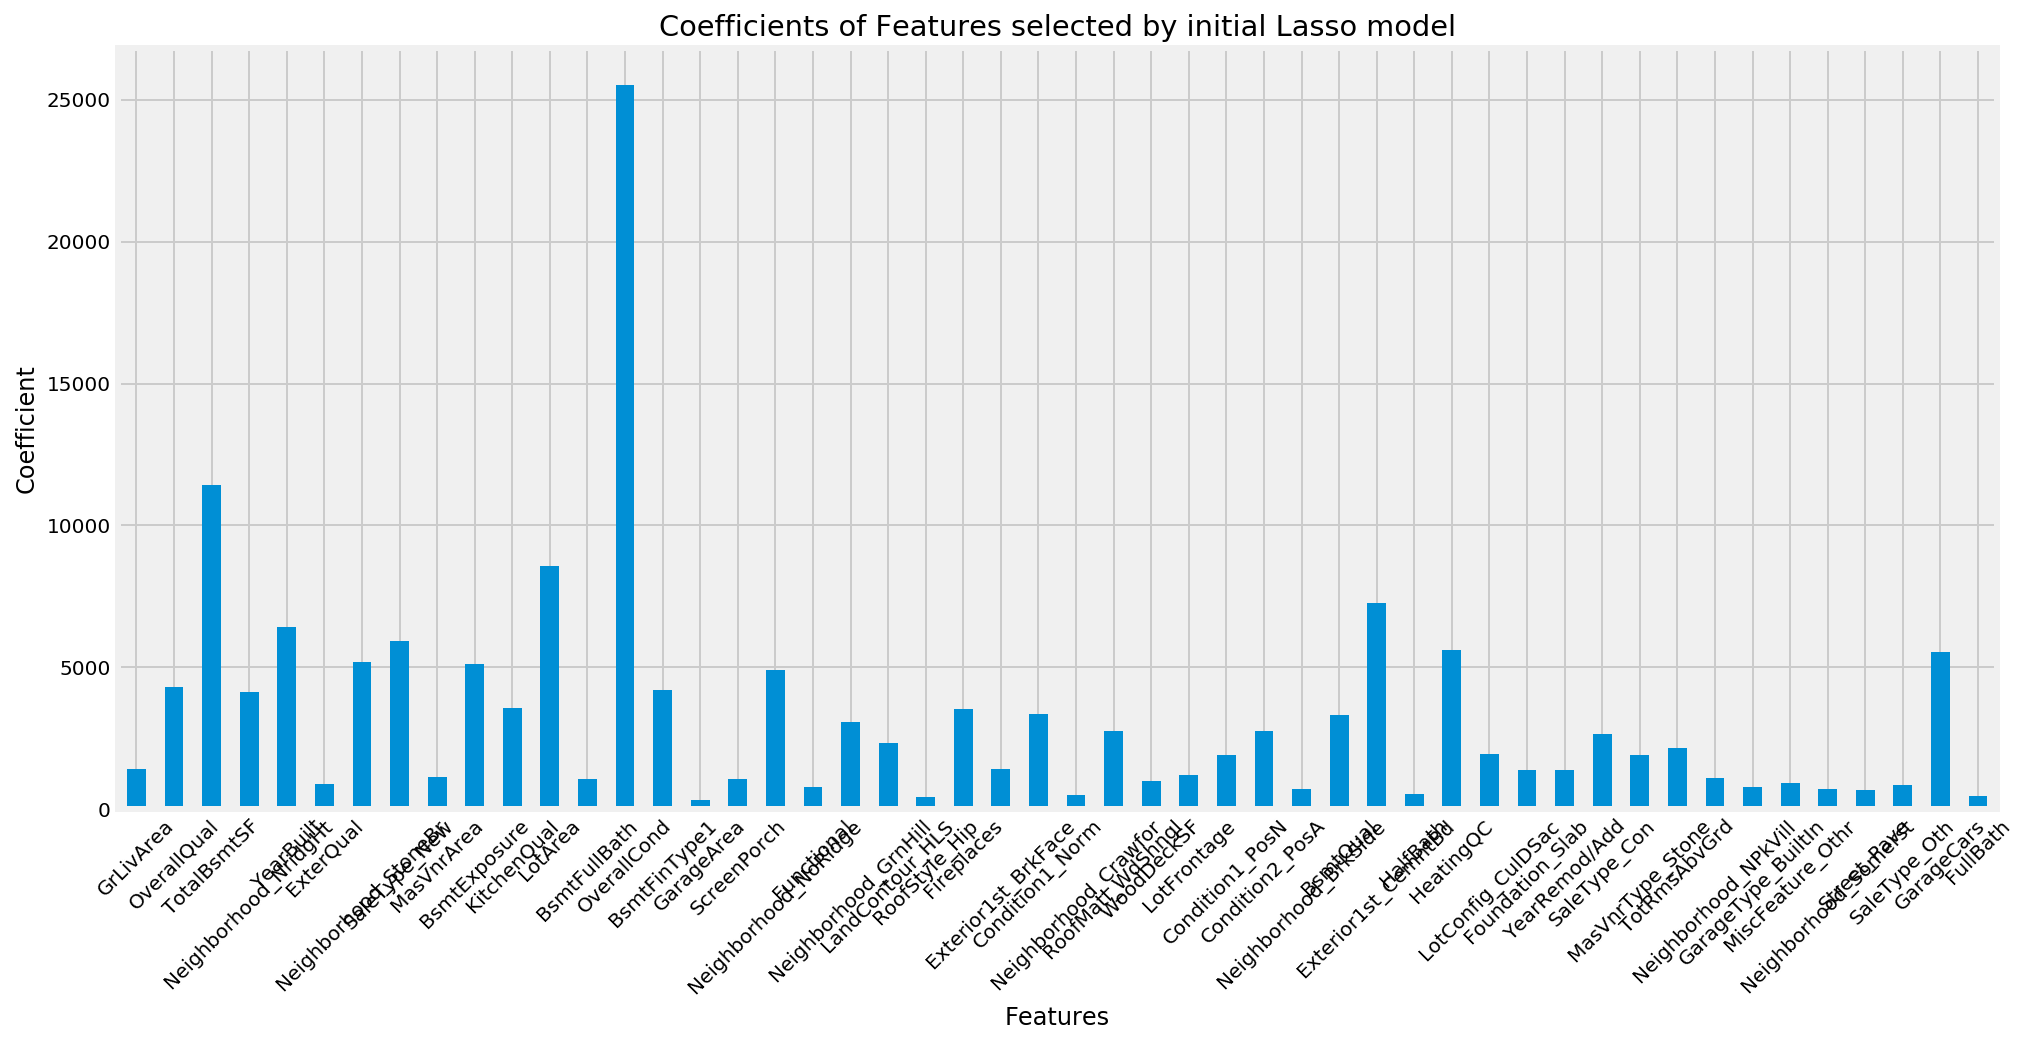

In [47]:
#For visualisation purposes
pd.Series(lasso_mod_1.coef_[(lasso_mod_1.coef_) >331], index=features_1).plot.bar(figsize=(15, 7))
plt.title('Coefficients of Features selected by initial Lasso model');
plt.xlabel('Features');
plt.ylabel('Coefficient');
plt.xticks(rotation=45);

#### Redefining Features and Target variable

In [48]:
X = train_clean[features_1]
y = train_clean[target]
testdata_X = test_clean[features_1]

#### Train test split and scaling

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
#Scale data
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

#Real unseen data we will be predicting on
testdata_X_ss= ss.transform(testdata_X)


In [51]:
#Instantiate models
lr = LinearRegression()

lasso = LassoCV(n_alphas=200)

ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

enet = ElasticNetCV(l1_ratio=np.linspace(0.001, 1, 50), n_alphas = 100)

In [52]:
lr_scores = cross_val_score(lr, X_train_ss, y_train, cv=5)
lr_scores.mean()

0.8981621458392803

In [53]:
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=5)
lasso_scores.mean()

0.8975020812363942

In [54]:
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=5)
ridge_scores.mean()

0.8973285730857719

In [55]:
enet_scores = cross_val_score(enet, X_train_ss, y_train, cv=5)
enet_scores.mean()

0.8975133903180433

Based on scores of the scores of different algorithms above, the lasso model seemed to perform the best (scored nearest to 1). 
Hence, lets predict using the Lasso

In [56]:
#Instantiate lasso model
lasso = LassoCV(n_alphas=200)
lasso.fit(X_train_ss, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [57]:
print('Best Lasso alpha:', lasso.alpha_)
print('Training score:', lasso.score(X_train_ss, y_train))
print("Test Score:", lasso.score(X_test_ss, y_test))
print('Lasso coefficients:', lasso.coef_)

Best Lasso alpha: 173.54322491313502
Training score: 0.9102500955934356
Test Score: 0.904994932123902
Lasso coefficients: [22305.45879369 10398.62888838  9994.24143057  7715.24264626
  5351.90479767  6516.55722408  5556.92383309  6420.6295477
  3792.67438279  4522.750597    5341.33073175  5679.40878071
  4359.73171201  4603.01305621  2842.78473991  3945.16618679
  3506.07836981  4327.18836253  3071.43441578  2847.40804742
  3183.90653164  2882.41252953  2944.21802923  2559.83159339
  2558.67172625  2348.10869153  2307.83776395  1717.19381001
  3509.60668214  2109.38816877  1926.66682623  2613.7458023
  1093.5596024   1135.38120991  1521.75771479  2301.11915028
  1904.90754248  3045.8143573   1279.03583376  1191.64134791
  1709.98363912    -0.           846.8205689   1588.48024526
   783.27033357  1565.06841086   699.47488358   916.52808471
     0.             0.        ]


In [58]:
#predict our unseen data
l_pred = lasso.predict(testdata_X_ss)

In [59]:
#predicted mean sale price
l_pred.mean()

180649.2835786753

In [60]:
#Saving to dataframe for kaggle submission
submission = pd.DataFrame(l_pred, columns=['SalePrice'])
submission['Id'] = test_clean['Id']
submission = submission[['Id', 'SalePrice']]

#### Save Submission file

In [61]:
submission.to_csv('../datasets/submission.csv', index=False)

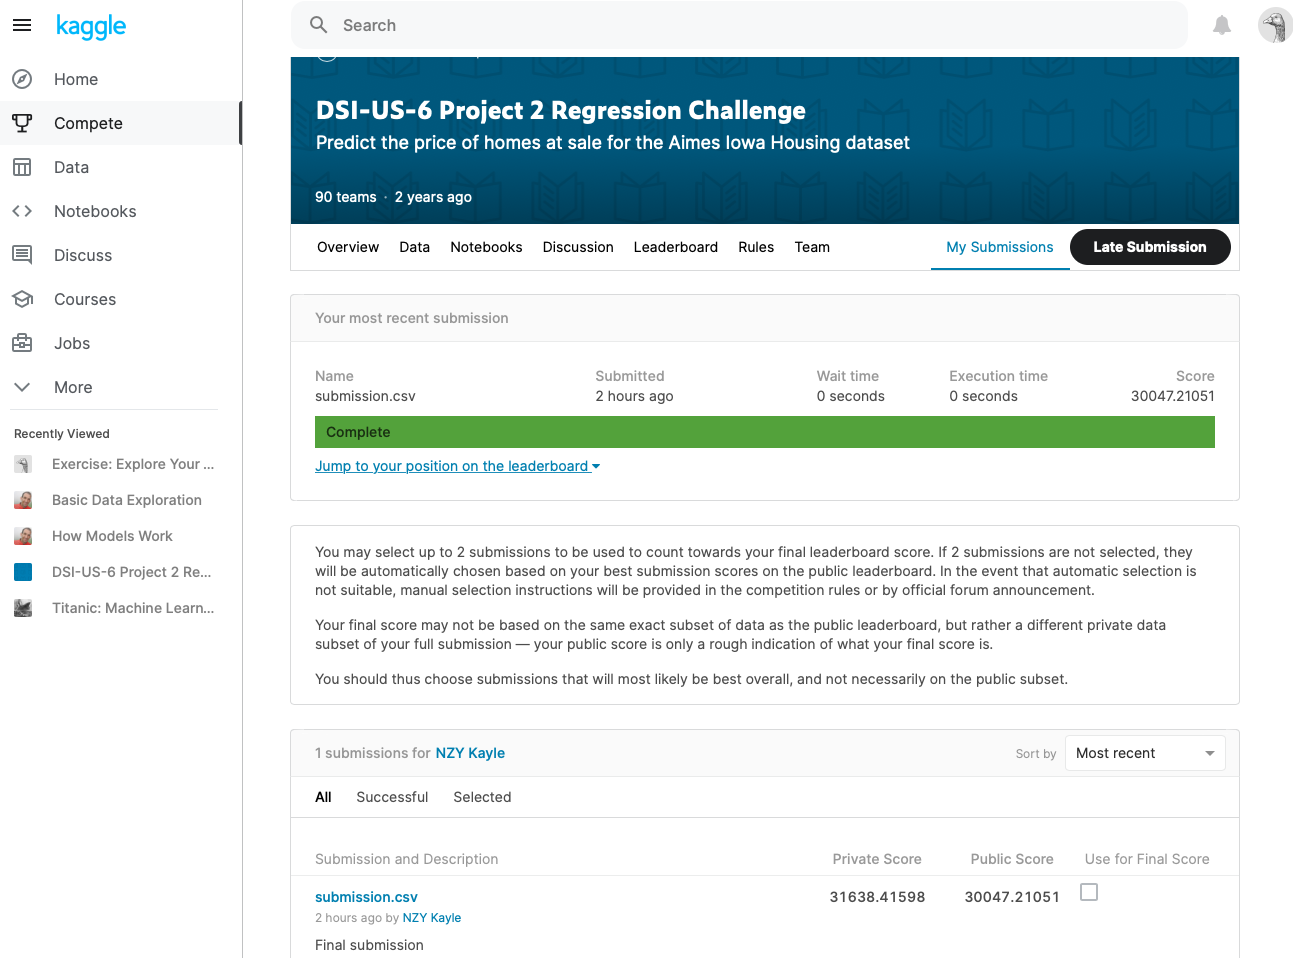

In [5]:
from IPython.display import Image 

Image('../images/kaggle_submission.png')

**Next:** [Recommendations](./03_Recommendations.ipynb  )